## Train and explain a model

Note that this is a small sample of the whole data for demonstration purpose.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/seattle_sample_500.csv")

In [3]:
data = gpd.GeoDataFrame(
    data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))

In [4]:
y = data.log_price

X_coords = data[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition',
                 'waterfront', 'view', 'age','UTM_X', 'UTM_Y']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_coords, y, random_state=1)

## Model training

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=10, random_state=0)
rf_model.fit(X_train.values, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, rf_model.predict(X_test))

/Users/ziqili/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.6756914430682947

In [8]:
from geoshapley import GeoShapleyExplainer

In [9]:
import shap
background_X = X_coords.values

In [10]:
explainer = GeoShapleyExplainer(rf_model.predict, background_X)
rslt = explainer.explain(X_coords,n_jobs=-1)

  0%|          | 0/500 [00:00<?, ?it/s]

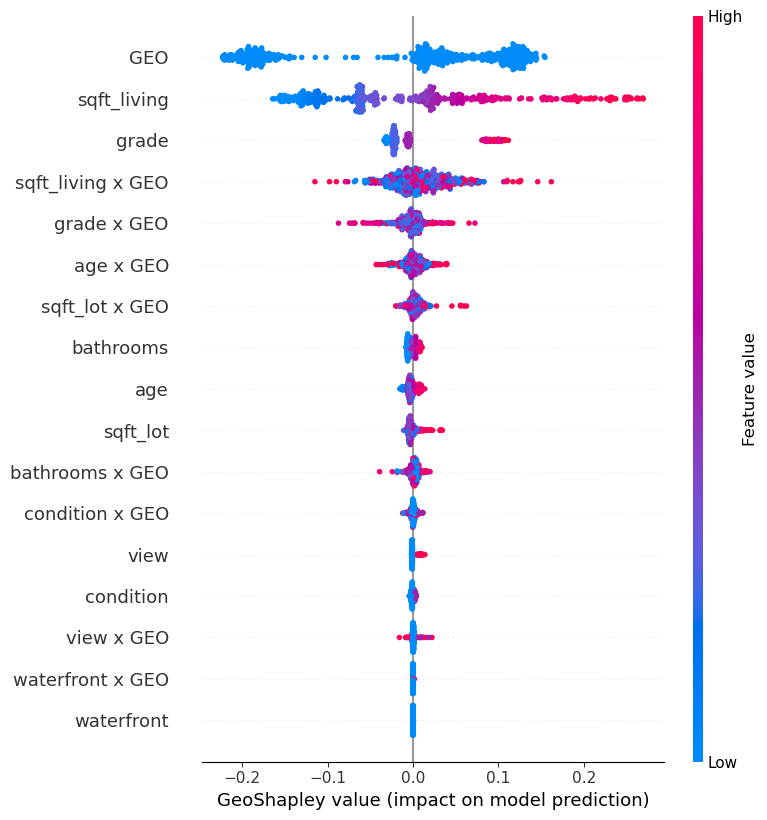

In [11]:
rslt.summary_plot(dpi=100)

In [12]:
rslt.summary_statistics()

,min,25%,50%,75%,max,mean,std,abs. mean
GEO,-0.222937,-0.165840,0.026003,0.106960,0.154668,-0.006135,0.123974,0.104965
sqft_living,-0.164366,-0.097682,-0.013446,0.053069,0.269708,-0.004319,0.107732,0.087867
grade,-0.033967,-0.022856,-0.020814,-0.004791,0.111798,0.001301,0.043733,0.031660
sqft_living x GEO,-0.114786,-0.011890,0.005120,0.027422,0.162116,0.008638,0.034103,0.025819
grade x GEO,-0.087222,-0.008390,-0.001579,0.005091,0.072621,-0.002602,0.015807,0.010213
age x GEO,-0.043095,-0.003390,0.001651,0.008466,0.039656,0.001907,0.011836,0.008575
sqft_lot x GEO,-0.020197,-0.001157,0.002076,0.005960,0.062652,0.002826,0.008239,0.005539
bathrooms,-0.008299,-0.004674,-0.002099,0.003353,0.010516,-0.000622,0.004921,0.004422
age,-0.015376,-0.004190,-0.002169,0.001748,0.013949,-0.000954,0.005059,0.004236
sqft_lot,-0.010980,-0.004347,-0.002953,-0.000269,0.034480,-0.001413,0.005378,0.004019


In [20]:
rslt.check_additivity()

Components add up to model prediction:  True


X has feature names, but RandomForestRegressor was fitted without feature names


### Location invariant primary effects

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


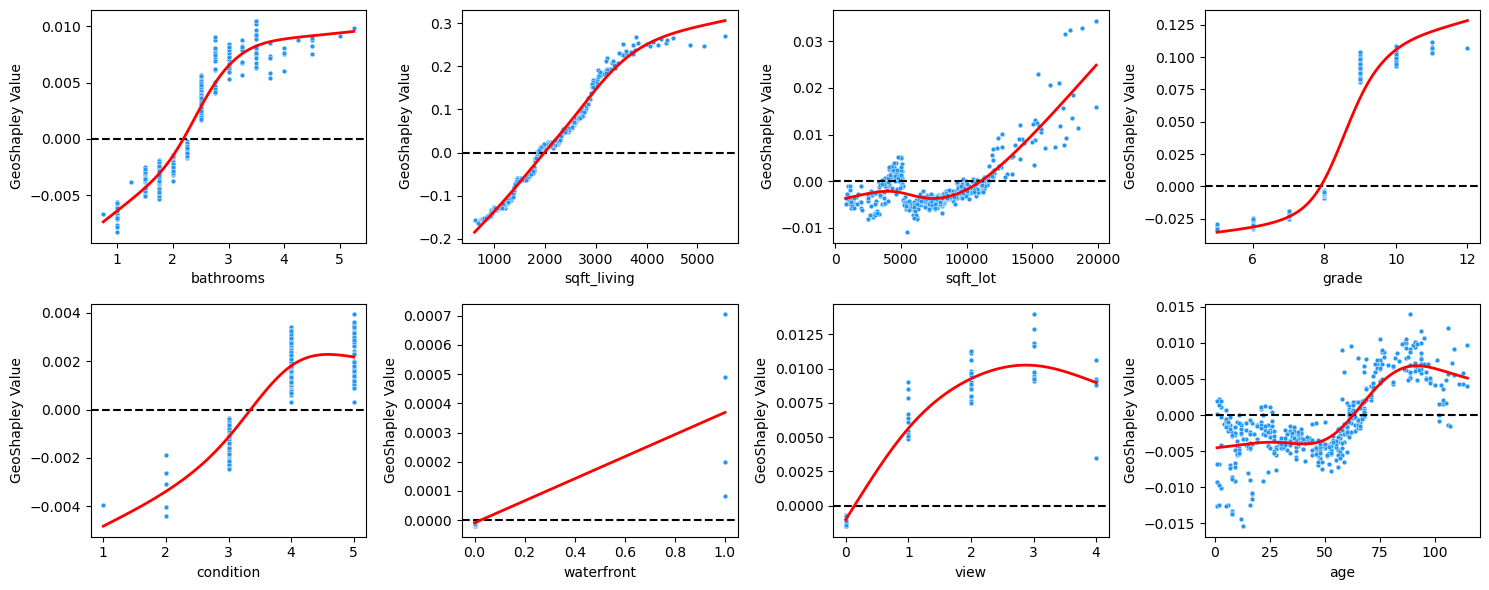

In [13]:
rslt.partial_dependence_plots(figsize=(15,6),max_cols=4,gam_curve=True)

In [14]:
coords = data[['UTM_X','UTM_Y']].values

In [24]:
svc = rslt.get_svc(col = [0,1,2,3,4,5,6,7], coef_type="gwr", include_primary=False, coords=coords)

In [16]:
import contextily as cx

### Intrinsic location effect

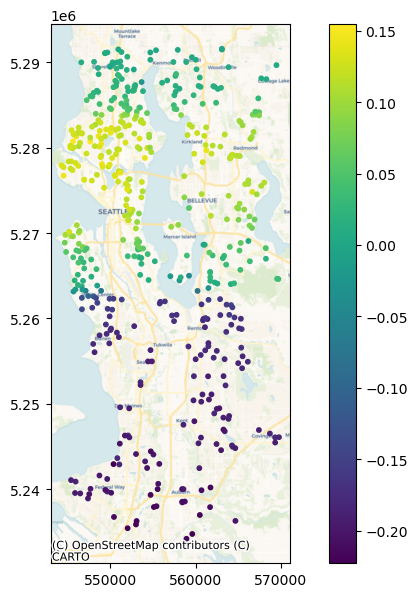

In [17]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),dpi=100)

data.plot(ax=ax,column=rslt.geo,
                  s=10,figsize=(10,10),legend=True)

cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=data.crs,zoom=11)

### Spatially varying coefficient for sqft_living (after removing global primary effect)

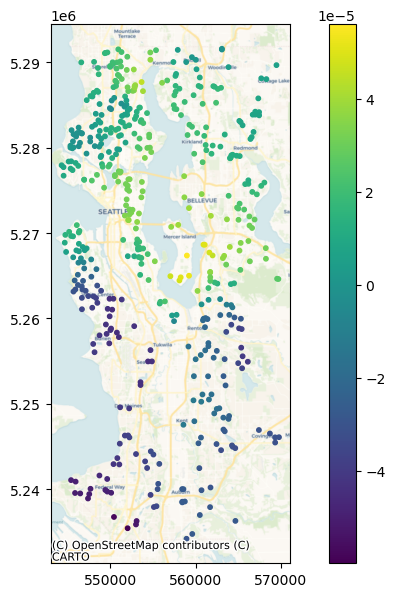

In [27]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),dpi=100)

data.plot(ax=ax,column=svc[:,1],
                  s=10,figsize=(10,10),legend=True)

cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=data.crs,zoom=11)